In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [6]:
# Create a set of random lats and longs

lats = np.random.uniform(-90.000, 90.000, size=1500)

longs = np.random.uniform(-180.000, 180.000, size=1500)

lat_longs = zip(lats, longs)

lat_longs

In [7]:
coordinates = list(lat_longs)

In [8]:
# Create new list to hold city names

cities = []

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:

        cities.append(city)

len(cities)

605

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Empty list to hold weather data
city_data = []

print('Beginning Data Retrieval     ')

print('-----------------------------')

# Create counters
record_count = 1

set_count = 1

# Loop through all cities in city list
for i, city in enumerate(cities):

    # Grouping cities in set of 50 for logging
    if (i % 50 == 0 and i >= 50):

        set_count += 1

        record_count = 1

        time.sleep(60)

    # Create endpoint URL for each city
    city_url = url + '&q=' + city.replace(' ','+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}')

    # Add 1 to record count
    record_count += 1

    try:

        city_weather = requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']

        city_long = city_weather['coord']['lon']

        city_max_temp = city_weather['main']['temp_max']

        city_humidity = city_weather['main']['humidity']

        city_clouds = city_weather['clouds']['all']

        city_wind = city_weather['wind']['speed']

        city_country = city_weather['sys']['country']

        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({'City': city.title(),
                            'Lat': city_lat,
                            'Long': city_long,
                            'Max Temp': city_max_temp,
                            'Humidity': city_humidity,
                            'Cloudiness': city_clouds,
                            'Wind Speed': city_wind,
                            'Country': city_country,
                            'Date': city_date})

    except:

        print('City not found. Skipping...')

        pass

# Indicate the data loading is complete

print('-----------------------------')

print('Data Retrieval Complete      ')

print('-----------------------------')


Beginning Data Retrieval     
-----------------------------
Processing record 1 of set 1 | grand forks
Processing record 2 of set 1 | taolanaro
City not found. Skipping...
Processing record 3 of set 1 | upernavik
Processing record 4 of set 1 | gobabis
Processing record 5 of set 1 | sorong
Processing record 6 of set 1 | albany
Processing record 7 of set 1 | conde
Processing record 8 of set 1 | carnarvon
Processing record 9 of set 1 | abonnema
Processing record 10 of set 1 | mataura
Processing record 11 of set 1 | tsihombe
City not found. Skipping...
Processing record 12 of set 1 | highland park
Processing record 13 of set 1 | cabo san lucas
Processing record 14 of set 1 | esperance
Processing record 15 of set 1 | ribeira grande
Processing record 16 of set 1 | punta arenas
Processing record 17 of set 1 | jiamusi
Processing record 18 of set 1 | christchurch
Processing record 19 of set 1 | hobart
Processing record 20 of set 1 | hithadhoo
Processing record 21 of set 1 | karaton
Processing r

In [11]:
len(city_data)

555

In [13]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Forks,47.9417,-97.4337,30.13,93,100,20.71,US,2022-04-12 20:13:06
1,Upernavik,72.7868,-56.1549,12.04,92,100,9.64,GL,2022-04-12 20:16:16
2,Gobabis,-22.4500,18.9667,73.96,35,100,5.73,NA,2022-04-12 20:16:16
3,Sorong,-0.8833,131.2500,81.55,76,100,5.79,ID,2022-04-12 20:16:16
4,Albany,42.6001,-73.9662,68.04,35,0,3.00,US,2022-04-12 20:15:07
5,Conde,-7.2597,-34.9075,81.86,74,20,9.22,BR,2022-04-12 20:16:17
6,Carnarvon,-24.8667,113.6333,60.87,77,0,9.22,AU,2022-04-12 20:16:17
7,Abonnema,4.7084,6.7931,80.89,80,100,3.67,NG,2022-04-12 20:16:17
8,Mataura,-46.1927,168.8643,48.47,96,84,2.82,NZ,2022-04-12 20:16:18
9,Highland Park,42.1817,-87.8003,71.35,40,75,10.00,US,2022-04-12 20:15:09


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

In [17]:
output_data_file = 'weather_data/cities.csv'

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [18]:
lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

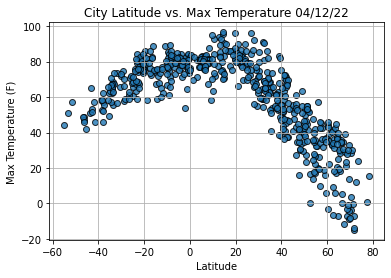

In [19]:
# Import the time module

import time

# Build scatter plot for latitude vs. max temp.

fig, ax = plt.subplots()
ax.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties

ax.set_title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))

ax.set_ylabel('Max Temperature (F)')

ax.set_xlabel('Latitude')

ax.grid(True)

# Save the figure in weather_data file

plt.savefig('weather_data/Fig1.png')

plt.show()

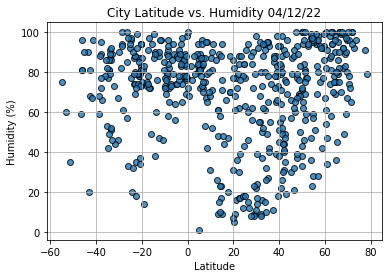

In [20]:
fig, ax = plt.subplots()
ax.scatter(lats, humidity,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

ax.set_title(f'City Latitude vs. Humidity '+ time.strftime('%x'))

ax.set_ylabel('Humidity (%)')

ax.set_xlabel('Latitude')

ax.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

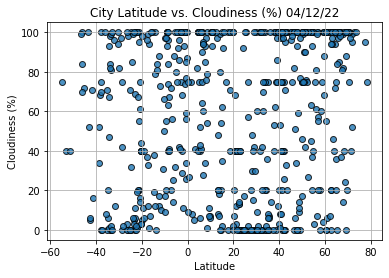

In [21]:
fig, ax = plt.subplots()
ax.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

ax.set_title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))

ax.set_ylabel('Cloudiness (%)')

ax.set_xlabel('Latitude')

ax.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

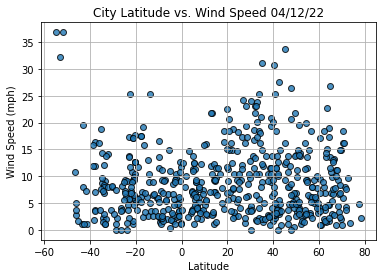

In [22]:
fig, ax = plt.subplots()
ax.scatter(lats, wind_speed,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

ax.set_title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))

ax.set_ylabel('Wind Speed (mph)')

ax.set_xlabel('Latitude')

ax.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()